In [1]:
import os
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지 숨김
from glob import glob
import numpy as np
import matplotlib
import seaborn as sns
import PIL
PIL.Image

<module 'PIL.Image' from 'C:\\Users\\sangt\\anaconda3\\lib\\site-packages\\PIL\\Image.py'>

In [2]:
import pandas as pd
label_df = pd.read_csv('data/train.csv')
label_df.head()

,file_name,label
0,001.png,10-2
1,002.png,10-1
2,003.png,3
3,004.png,8
4,005.png,9


In [3]:
def load_CIFAR10(path):
    
    path = path
    images = []
    for filename in glob(path +"*"):
        #print(filename)
        for img in glob(filename):
            #print(img)
            an_img = PIL.Image.open(img) #read img
            img_array = np.array(an_img) #img to array
            images.append(img_array) #append array to training_images
    images = np.array(images)

    return images

In [4]:
training_images = load_CIFAR10(path='data/train/')

In [5]:
print("train 이미지 크기:", training_images.shape)
print("train 라벨 크기:", label_df.shape)

train 이미지 크기: (858, 224, 224, 3)
train 라벨 크기: (858, 2)


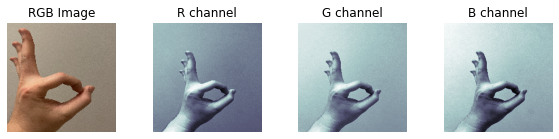

In [6]:
import matplotlib.pyplot as plt

img_rgb = training_images[0]

plt.figure(figsize=(10, 2))

plt.subplot(141)
plt.imshow(img_rgb[50:200, 50:200, :])
plt.axis("off")
plt.title("RGB Image")

plt.subplot(142)
plt.imshow(img_rgb[:, :, 0], cmap=plt.cm.bone)
plt.axis("off")
plt.title("R channel")

plt.subplot(143)
plt.imshow(img_rgb[:, :, 1], cmap=plt.cm.bone)
plt.axis("off")
plt.title("G channel")

plt.subplot(144)
plt.imshow(img_rgb[:, :, 2], cmap=plt.cm.bone)
plt.axis("off")
plt.title("B channel")

plt.show()

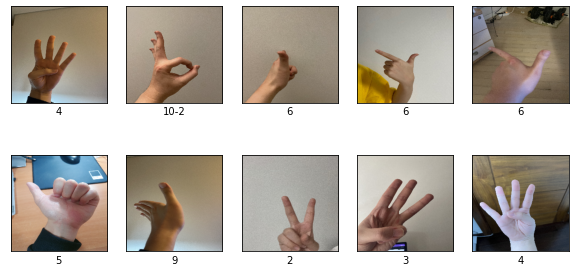

In [7]:
%matplotlib inline

plt.figure(figsize=[10,5])
for i in range(10):
    import random
    num = random.randint(0,858)
    plt.subplot(2, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(label_df.label[num])
    plt.imshow(training_images[num])
plt.show()

In [8]:
print(np.unique(label_df.label))

['1' '10-1' '10-2' '2' '3' '4' '5' '6' '7' '8' '9']


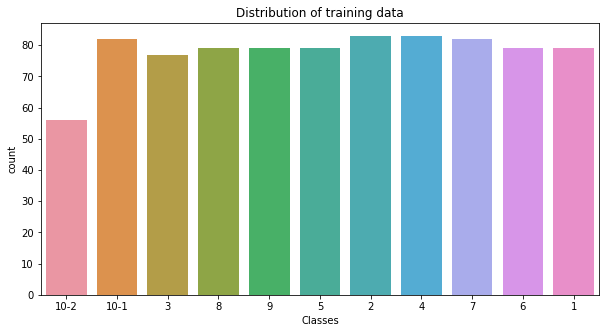

In [9]:
plt.figure(figsize=[10,5])
sns.countplot(label_df.label.ravel())
plt.title('Distribution of training data')
plt.xlabel('Classes')
plt.show()

In [10]:
label_df['label'][label_df['label'] == '10-1'] = 10 ## label : 10-1 -> 10
label_df['label'][label_df['label'] == '10-2'] = 0 ## Label : 10-2 -> 0
label_df['label'] = label_df['label'].apply(lambda x : int(x)) ## Dtype : object -> int

In [11]:
print(np.unique(label_df.label))

[ 0  1  2  3  4  5  6  7  8  9 10]


In [12]:
# https://dacon.io/competitions/official/235896/codeshare/4947?page=1&dtype=recent&ptype

CNN 적용

In [13]:
!pip install torch
!pip install torchvision

In [14]:
import os
import torch
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu') #GPU 할당

In [15]:
#하이퍼 파라미터 튜닝

CFG = {
    'IMG_SIZE':128, #이미지 사이즈
    'EPOCHS':50, #에포크
    'LEARNING_RATE':2e-2, #학습률
    'BATCH_SIZE':12, #배치사이즈
    'SEED':41, #시드
}

import random
import numpy as np

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(CFG['SEED'])

In [16]:
import pandas as pd
label_df = pd.read_csv('data/train.csv')
label_df.head()

,file_name,label
0,001.png,10-2
1,002.png,10-1
2,003.png,3
3,004.png,8
4,005.png,9


In [17]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  858 non-null    object
 1   label      858 non-null    object
dtypes: object(2)
memory usage: 13.5+ KB


In [18]:
label_df['label'][label_df['label'] == '10-1'] = 10 ## label : 10-1 -> 10
label_df['label'][label_df['label'] == '10-2'] = 0 ## Label : 10-2 -> 0
label_df['label'] = label_df['label'].apply(lambda x : int(x)) ## Dtype : object -> int

label_df.head()

,file_name,label
0,001.png,0
1,002.png,10
2,003.png,3
3,004.png,8
4,005.png,9


In [19]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  858 non-null    object
 1   label      858 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.5+ KB


In [29]:
from glob import glob
import os 

def get_train_data(data_dir):
    img_path_list = []
    label_list = []
    path = img_path_list.extend(glob(os.path.join(data_dir, '*.png')))

    #img_path_list.sort(key=lambda x:int(x.split('/')[-1].split('.')[0]))
    #img_path_list.sort(key=lambda x:int(x.split('\\')[-1].split('.')[0]))
        
    # get label
    #label_df = pd.read_csv(data_dir+'/train.csv')
    label_list.extend(label_df['label'])
                
    return img_path_list, label_list

def get_test_data(data_dir):
    img_path_list = []
    
    # get image path
    img_path_list.extend(glob(os.path.join(data_dir, '*.png')))
    
    #img_path_list.sort(key=lambda x:int(x.split('/')[-1].split('.')[0]))
    img_path_list.sort(key=lambda x:int(x.split('\\')[-1].split('.')[0]))
    
    return img_path_list

print(os.getcwd())
all_img_path, all_label = get_train_data('./data/train/')
test_img_path = get_test_data('./data/test/')

print(len(all_label))
print(all_img_path)
print(test_img_path)

C:\Git\python-ai-training\project\[데이콘] 수화 이미지 분류 경진대회
858
['./data/train\\001.png', './data/train\\002.png', './data/train\\003.png', './data/train\\004.png', './data/train\\005.png', './data/train\\006.png', './data/train\\007.png', './data/train\\008.png', './data/train\\009.png', './data/train\\010.png', './data/train\\011.png', './data/train\\012.png', './data/train\\013.png', './data/train\\014.png', './data/train\\015.png', './data/train\\016.png', './data/train\\017.png', './data/train\\018.png', './data/train\\019.png', './data/train\\020.png', './data/train\\021.png', './data/train\\022.png', './data/train\\023.png', './data/train\\024.png', './data/train\\025.png', './data/train\\026.png', './data/train\\027.png', './data/train\\028.png', './data/train\\029.png', './data/train\\030.png', './data/train\\031.png', './data/train\\032.png', './data/train\\033.png', './data/train\\034.png', './data/train\\035.png', './data/train\\036.png', './data/train\\037.png', './data/train\\

In [30]:
all_label[0:5]

[0, 10, 3, 8, 9]

In [31]:
import torchvision.datasets as datasets # 이미지 데이터셋 집합체
import torchvision.transforms as transforms # 이미지 변환 툴

from torch.utils.data import DataLoader # 학습 및 배치로 모델에 넣어주기 위한 툴
from torch.utils.data import DataLoader, Dataset

class CustomDataset(Dataset):
    def __init__(self, img_path_list, label_list, train_mode=True, transforms=None): #필요한 변수들을 선언
        self.transforms = transforms
        self.train_mode = train_mode
        self.img_path_list = img_path_list
        self.label_list = label_list

    def __getitem__(self, index): #index번째 data를 return
        img_path = self.img_path_list[index]
        # Get image data
        image = cv2.imread(img_path)
        if self.transforms is not None:
            image = self.transforms(image)

        if self.train_mode:
            label = self.label_list[index]
            return image, label
        else:
            return image
    
    def __len__(self): #길이 return
        return len(self.img_path_list)
    
# Train : Validation = 0.8 : 0.25 Split
train_len = int(len(all_img_path)*0.75)
Vali_len = int(len(all_img_path)*0.25)

train_img_path = all_img_path[:train_len]
train_label = all_label[:train_len]

vali_img_path = all_img_path[train_len:]
vali_label = all_label[train_len:]

print('train set 길이 : ', train_len)
print('vaildation set 길이 : ', Vali_len)

train set 길이 :  643
vaildation set 길이 :  214
